In [6]:
from scipy import *
from pylab import *
import numpy as np
from scipy.interpolate import interp1d
from IPython.display import Image

h=0.7
k_arr = logspace(-2,1.5,100)

####################################################
### test plots for neutrino batch fiducial model ###
####################################################

####### linear Pmatter from camb
kcamb1, Pcamb1 = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_0.dat').T
kcamb0, Pcamb0 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_0.dat').T

####### bird halofit
kbird1, Pbird1 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-bird_matterpow_0.dat').T
kbird0, Pbird0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-bird_matterpow_0.dat').T

####### takahashi halofit
ktaka1, Ptaka1 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-halofit_matterpow_0.dat').T
ktaka0, Ptaka0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-halofit_matterpow_0.dat').T

####### n-body P_total
knb0, Pnb0 = np.loadtxt('matterpower/powerspec_tot_050_massless.txt').T
knb1, Pnb1 = np.loadtxt('matterpower/powerspec_tot_050_massive.txt').T
knb1_z3, Pnb1_z3 = np.loadtxt('matterpower/powerspec_tot_000_massive.txt').T
knb0 *= 1e3
knb1 *= 1e3
knb1_z3 *=1e3
Pnb0 *= 1e-9
Pnb1 *= 1e-9
Pnb1_z3 *= 1e-9

###### P_neutrino from n-body run for the Mnv = 0.1 eV run (fiducial)
knu_z0, Pnu_z0 = np.loadtxt('matterpower/powerspec_nu_050.txt',skiprows=2).T
knu_z3, Pnu_z3 = np.loadtxt('matterpower/powerspec_nu_000.txt',skiprows=2).T
knu_z0 *= 1e3
Pnu_z0 *= 1e-9 #(2*pi)**3
knu_z3 *= 1e3
Pnu_z3 *= 1e-9 #(2*pi)**3

###### interpolate to have the same bins for camb output Pmatter
Pcamb1_interp = interp1d(kcamb1, Pcamb1)(k_arr)
Pcamb0_interp = interp1d(kcamb0, Pcamb0)(k_arr)
Pbird1_interp = interp1d(kbird1, Pbird1)(k_arr)
Pbird0_interp = interp1d(kbird0, Pbird0)(k_arr)
Ptaka1_interp = interp1d(ktaka1, Ptaka1)(k_arr)
Ptaka0_interp = interp1d(ktaka0, Ptaka0)(k_arr)

###### P_matter of DM+bary, or "no neutrino" (nn)
kTF, Ttot, Tnn, Tnu = loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_transfer_0.dat').T[[0,6,7,5]]
ratio_nn = interp1d(kTF, (Tnn/Ttot)**2)(k_arr)
ratio_nu = interp1d(kTF, (Tnu/Ttot)**2)(k_arr)
Pnn_z0 = Pcamb1_interp * ratio_nn

kcamb1_z3, Pcamb1_z3 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_3.dat').T
Pcamb1_z3_interp = interp1d(kcamb1_z3, Pcamb1_z3, fill_value="extrapolate")(k_arr)
kTF_z3, Ttot_z3, Tnn_z3, Tnu_z3 = loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_transfer_3.dat').T[[0,6,7,5]]
ratio_nn_z3 = interp1d(kTF_z3, (Tnn_z3/Ttot_z3)**2)(k_arr)
Pnn_z3 = Pcamb1_z3_interp * ratio_nn_z3
ratio_nu_z3 = interp1d(kTF_z3, (Tnu_z3/Ttot_z3)**2)(k_arr)

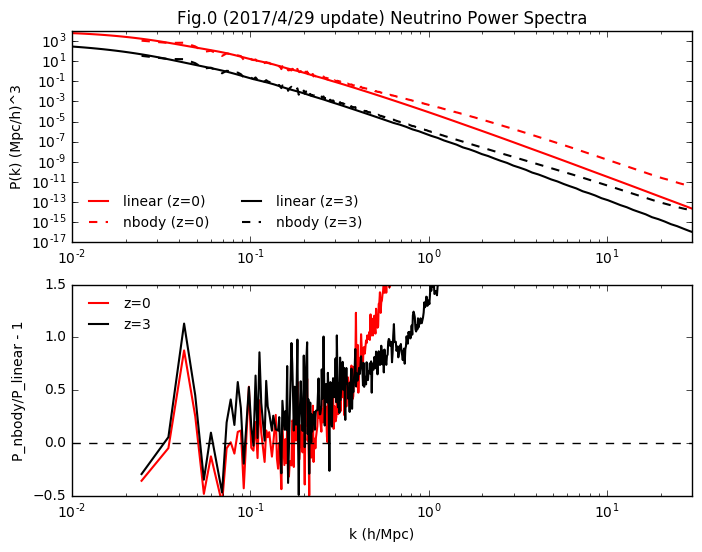

In [7]:
f=figure(figsize=(8,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(k_arr, ratio_nu*Pcamb1_interp, 'r-',lw=1.5,label='linear (z=0)')
ax.plot(knu_z0, Pnu_z0,'r--',lw=1.5,label='nbody (z=0)')

ax.plot(k_arr, ratio_nu_z3*Pcamb1_z3_interp, 'k-',lw=1.5,label='linear (z=3)')
ax.plot(knu_z3, Pnu_z3, 'k--',lw=1.5,label='nbody (z=3)')

ax.set_ylabel('P(k) (Mpc/h)^3')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
#ax.set_ylim(0.1, 1e5)
ax.set_title('Fig.0 (2017/4/29 update) Neutrino Power Spectra')
ax.legend(frameon=0,loc=3,fontsize=10,ncol=2)

Pnu1_z0_bin = interp1d(k_arr, ratio_nu*Pcamb1_interp, fill_value="extrapolate")(knu_z0)
Pnu1_z3_bin = interp1d(k_arr, ratio_nu_z3*Pcamb1_z3_interp, fill_value="extrapolate")(knu_z3)

ax2.plot(knu_z0, Pnu_z0/Pnu1_z0_bin-1, 'r-',lw=1.5,label='z=0')
ax2.plot(knu_z3, Pnu_z3/Pnu1_z3_bin-1, 'k-',lw=1.5,label='z=3')

ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P_nbody/P_linear - 1')
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.5, 1.5)
ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1)
ax2.plot([1e-2, 30],[0,0],'k--')
show()

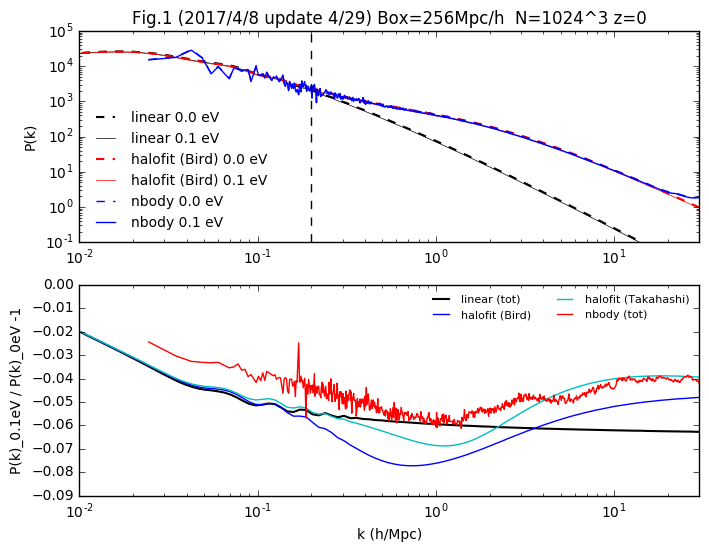

In [4]:
f=figure(figsize=(8,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(kcamb0, Pcamb0, 'k--',lw=1.5, label='linear 0.0 eV')
ax.plot(kcamb1, Pcamb1, 'k-', lw=0.5, label='linear 0.1 eV')

ax.plot(kbird0, Pbird0, 'r--',lw=1.5, label='halofit (Bird) 0.0 eV')
ax.plot(kbird1, Pbird1, 'r-', lw=0.5, label='halofit (Bird) 0.1 eV')

ax.plot(knb0, Pnb0, 'b--', lw=1,label='nbody 0.0 eV')
ax.plot(knb1, Pnb1, 'b-',  lw=1,label='nbody 0.1 eV')

ax.plot((0.2,0.2), (0.1,1e5),'k--')
ax.set_ylabel('P(k)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(0.1, 1e5)
ax.set_title('Fig.1 (2017/4/8 update 4/29) Box=256Mpc/h  N=1024^3 z=0')
ax.legend(frameon=0,loc=3,fontsize=10)


ax2.plot(k_arr,Pcamb1_interp/Pcamb0_interp-1,'k-',lw=1.5, label='linear (tot)')
ax2.plot(k_arr,Pbird1_interp/Pbird0_interp-1,'b-',lw=1.0, label='halofit (Bird)')
ax2.plot(k_arr,Ptaka1_interp/Ptaka0_interp-1,'c-',lw=1.0, label='halofit (Takahashi)')
ax2.plot(knb0,Pnb1/Pnb0-1,'r-',lw=1.0, label='nbody (tot)')

#ax2.plot(knb_bin,Pnb1_bin/Pnb0_bin-1,'rx',lw=1.0, label='nbody (no nu)')
#ax2.plot(k_arr, Pnn_z0/Pcamb0_interp-1,'kx',lw=1.0, label='linear (no nu)')


ax2.legend(frameon=0,fontsize=8,ncol=2)
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.09,0.0)
ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P(k)_0.1eV / P(k)_0eV -1')
show()

######## note on some test results:
######## the lower power is due to nu mass splitting
######## nor it's due to the definition in omega_m = 1-omega_lambda

# Fig.4 in Ali-Haimoud & Bird 2013

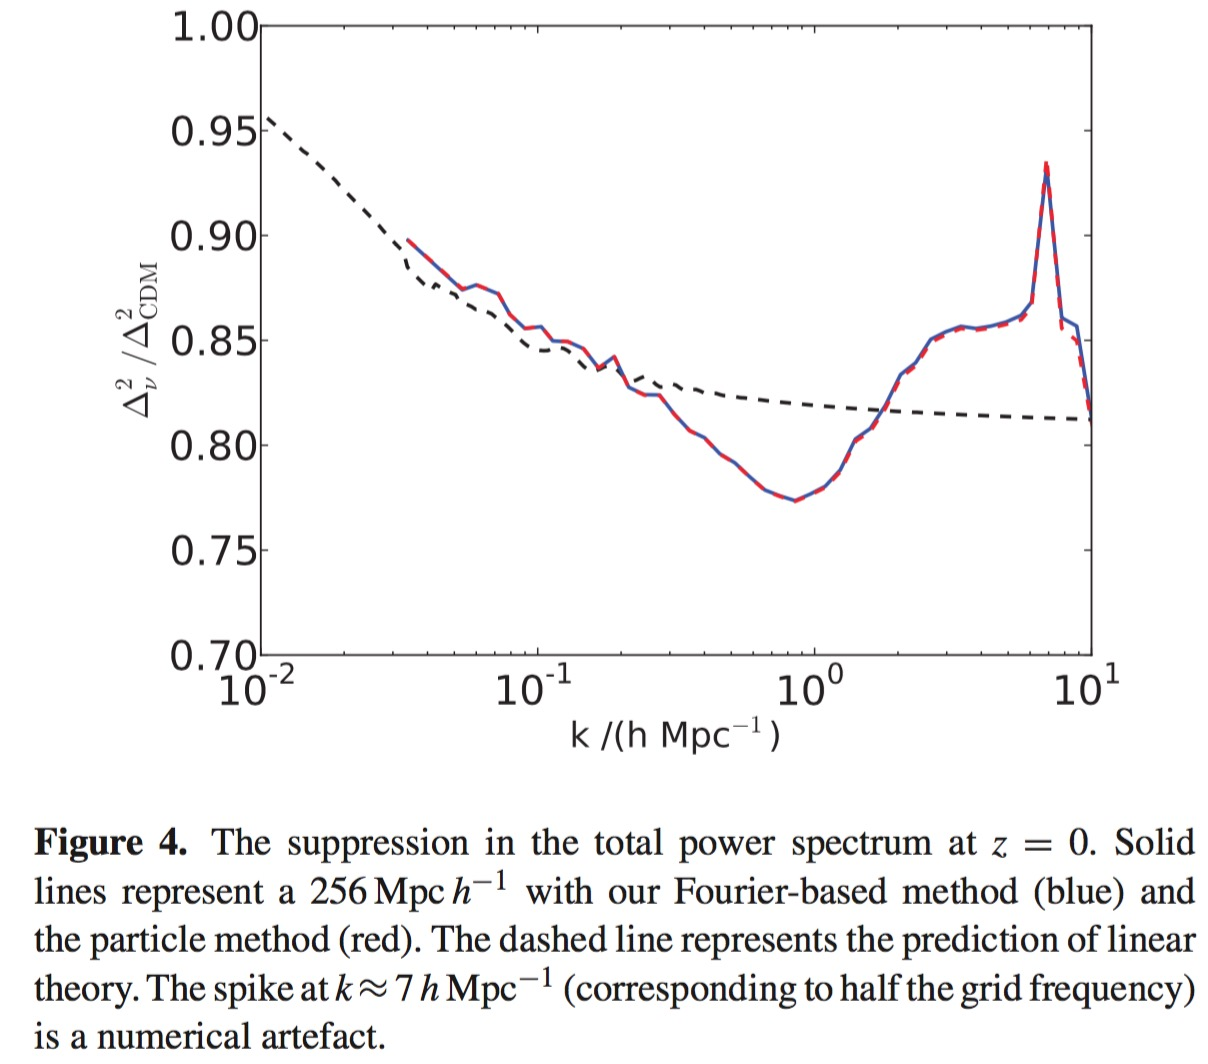

In [5]:
Image("plots/AB13fig4.jpg",width=450)

In [9]:
knb1_IC99, Pnb1_IC99 =  loadtxt ('matterpower/particles512/massive_z99/powerspec_tot_050.txt').T * array([[1e3], [1e-9]])
knb0_IC99, Pnb0_IC99 =  loadtxt ('matterpower/particles512/massless_z99/powerspec_tot_050.txt').T * array([[1e3], [1e-9]])

knbnu1_z0_IC99, Pnbnu1_z0_IC99 =  loadtxt ('matterpower/particles512/massive_z99/powerspec_nu_050.txt').T* array([[1e3], [1e-9]])
knbnu1_z3_IC99, Pnbnu1_z3_IC99 =  loadtxt ('matterpower/particles512/massive_z99/powerspec_nu_000.txt').T* array([[1e3], [1e-9]])
knbnu1_z3_IC49, Pnbnu1_z3_IC49 =  loadtxt ('matterpower/particles512/massive_z49/powerspec_nu_000.txt').T* array([[1e3], [1e-9]])

######### test for IC redshift
knb1_z3_IC99, Pnb1_z3_IC99 =  loadtxt ('matterpower/particles512/massive_z99/powerspec_tot_000.txt').T * array([[1e3], [1e-9]])
knb0_z3_IC99, Pnb0_z3_IC99 =  loadtxt ('matterpower/particles512/massless_z99/powerspec_tot_000.txt').T * array([[1e3], [1e-9]])
knb1_z3_IC49, Pnb1_z3_IC49 =  loadtxt ('matterpower/particles512/massive_z49/powerspec_tot_000.txt').T * array([[1e3], [1e-9]])
knb0_z3_IC49, Pnb0_z3_IC49 =  loadtxt ('matterpower/particles512/massless_z49/powerspec_tot_000.txt').T * array([[1e3], [1e-9]])

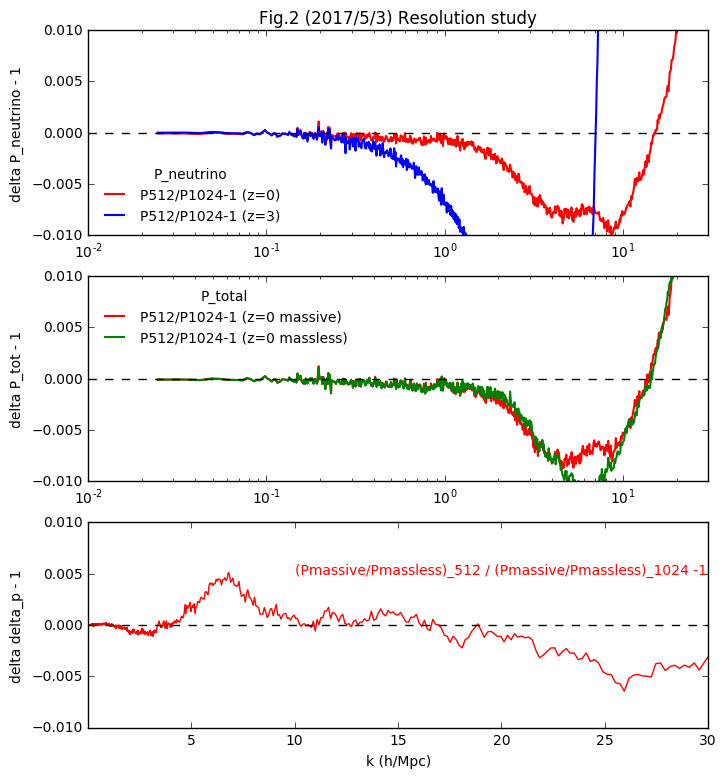

In [30]:
f=figure(figsize=(8,9))
ax=f.add_subplot(311)
ax2=f.add_subplot(312)
ax3=f.add_subplot(313)

ax.plot(knbnu1_z0_IC99, Pnbnu1_z0_IC99/Pnu_z0-1, 'r-',lw=1.5,label='P512/P1024-1 (z=0)')
ax.plot(knbnu1_z3_IC99, Pnbnu1_z3_IC99/Pnu_z3-1, 'b-',lw=1.5,label='P512/P1024-1 (z=3)')

#ax.plot(k_arr, ratio_nu_z3*Pcamb1_z3_interp, 'k-',lw=1.5,label='linear (z=3)')

ax.set_ylabel('delta P_neutrino - 1')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(-0.01,0.01)
ax.plot([1e-2, 30],[0,0],'k--')
ax.set_title('Fig.2 (2017/5/3) Resolution study')
ax.legend(frameon=0,loc=3,fontsize=10,ncol=1,title='P_neutrino')

ax2.plot(knb1_IC99, Pnb1_IC99/Pnb1-1, 'r-',lw=1.5,label='P512/P1024-1 (z=0 massive)')
ax2.plot(knb0_IC99, Pnb0_IC99/Pnb0-1, 'g-',lw=1.5,label='P512/P1024-1 (z=0 massless)')
ax2.set_ylabel('delta P_tot - 1')
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.01, 0.01)
ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_total')
ax2.plot([1e-2, 30],[0,0],'k--')

ax3.plot(knb1_IC99, (Pnb1_IC99/Pnb0_IC99)/(Pnb1/Pnb0)-1, 'r-',label='delta512/delta1024-1')
ax3.plot([1e-2, 30],[0,0],'k--')
ax3.set_ylabel('delta delta_p - 1')
ax3.text(10,0.005,'(Pmassive/Pmassless)_512 / (Pmassive/Pmassless)_1024 -1',color='r')
ax3.set_ylim(-0.01, 0.01)
ax3.set_xlim(1e-2, 30)
ax3.set_xlabel('k (h/Mpc)')
show()

In [ ]:
f=figure(figsize=(8,9))
ax=f.add_subplot(311)
ax2=f.add_subplot(312)
ax3=f.add_subplot(313)

ax.plot(knbnu1_z0_IC99, Pnbnu1_z0_IC99/Pnu_z0-1, 'r-',lw=1.5,label='P512/P1024-1 (z=0)')
ax.plot(knbnu1_z3_IC99, Pnbnu1_z3_IC99/Pnu_z3-1, 'b-',lw=1.5,label='P512/P1024-1 (z=3)')

#ax.plot(k_arr, ratio_nu_z3*Pcamb1_z3_interp, 'k-',lw=1.5,label='linear (z=3)')

ax.set_ylabel('delta P_neutrino - 1')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(-0.01,0.01)
ax.plot([1e-2, 30],[0,0],'k--')
ax.set_title('Fig.2 (2017/5/3) Resolution study')
ax.legend(frameon=0,loc=3,fontsize=10,ncol=1,title='P_neutrino')

ax2.plot(knb1_IC99, Pnb1_IC99/Pnb1-1, 'r-',lw=1.5,label='P512/P1024-1 (z=0 massive)')
ax2.plot(knb0_IC99, Pnb0_IC99/Pnb0-1, 'g-',lw=1.5,label='P512/P1024-1 (z=0 massless)')
ax2.set_ylabel('delta P_tot - 1')
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.01, 0.01)
ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_total')
ax2.plot([1e-2, 30],[0,0],'k--')

ax3.plot(knb1_IC99, (Pnb1_IC99/Pnb0_IC99)/(Pnb1/Pnb0)-1, 'r-',label='delta512/delta1024-1')
ax3.plot([1e-2, 30],[0,0],'k--')
ax3.set_ylabel('delta delta_p - 1')
ax3.text(10,0.005,'(Pmassive/Pmassless)_512 / (Pmassive/Pmassless)_1024 -1',color='r')
ax3.set_ylim(-0.01, 0.01)
ax3.set_xlim(1e-2, 30)
ax3.set_xlabel('k (h/Mpc)')
show()